In [193]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors
from matplotlib.colorbar import ColorbarBase
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.io as pio
from IPython.display import HTML
from folium import IFrame
import os
from tqdm import tqdm
import numpy as np
plt.style.use('ggplot')


In [159]:
gcc=gpd.read_file(f'D:\\Mobile Device Data\\Boundries\\latest_boundries\\all_processed_boundries\\all_boundaries_gcr.gpkg')
gcc_iz_id=gcc.groupby('iz_id')['geometry'].apply(lambda x: x.unary_union).reset_index()
gcc_iz_name=gcc.groupby('iz_name')['geometry'].apply(lambda x: x.unary_union).reset_index()
gcc_iz_id.set_index
gcc_iz_name.set_index
pass

# Load Analysis Files

In [127]:

radius=500

year=2019
fname=f'U:\\Projects\\Huq\\Faraz\\final_OD_work\\{year}\\trip_analysis_iz_{radius}m_{year}.csv'
df_2019=pd.read_csv(fname,index_col=0)


year=2020
fname=f'U:\\Projects\\Huq\\Faraz\\final_OD_work\\{year}\\trip_analysis_iz_{radius}m_{year}.csv'
df_2020=pd.read_csv(fname,index_col=0)


year=2021
fname=f'U:\\Projects\\Huq\\Faraz\\final_OD_work\\{year}\\trip_analysis_iz_{radius}m_{year}.csv'
df_2021=pd.read_csv(fname,index_col=0)

year=2022
fname=f'U:\\Projects\\Huq\\Faraz\\final_OD_work\\{year}\\trip_analysis_iz_{radius}m_{year}.csv'
df_2022=pd.read_csv(fname,index_col=0)


# Representativeness
We computed Origin-Destination (OD) matrices for both Council Level and Intermediate Zone level. Intermediate Zone provides a finer-grained geographical resolution, resulting in the detection of trips by an unrepresentative number of users. As illustrated in the figure below, there are a total of 173,889 possible OD pairs at the Intermediate Zone level. However, only 45487, 83958, 92970, and 57,533 OD pairs having detected trips in 2019, 2020, 2021, and 2022, respectively. Moreover, in 2019, out of the 45,487 OD pairs with detected trips, the number of trips for 36,252 OD pairs was made by fewer than 5 users. For OD pairs with only 1 user, this number stands at 21,126, highlighting a significant representativeness issue. This trend persists across the subsequent years, as depicted in the figure below.






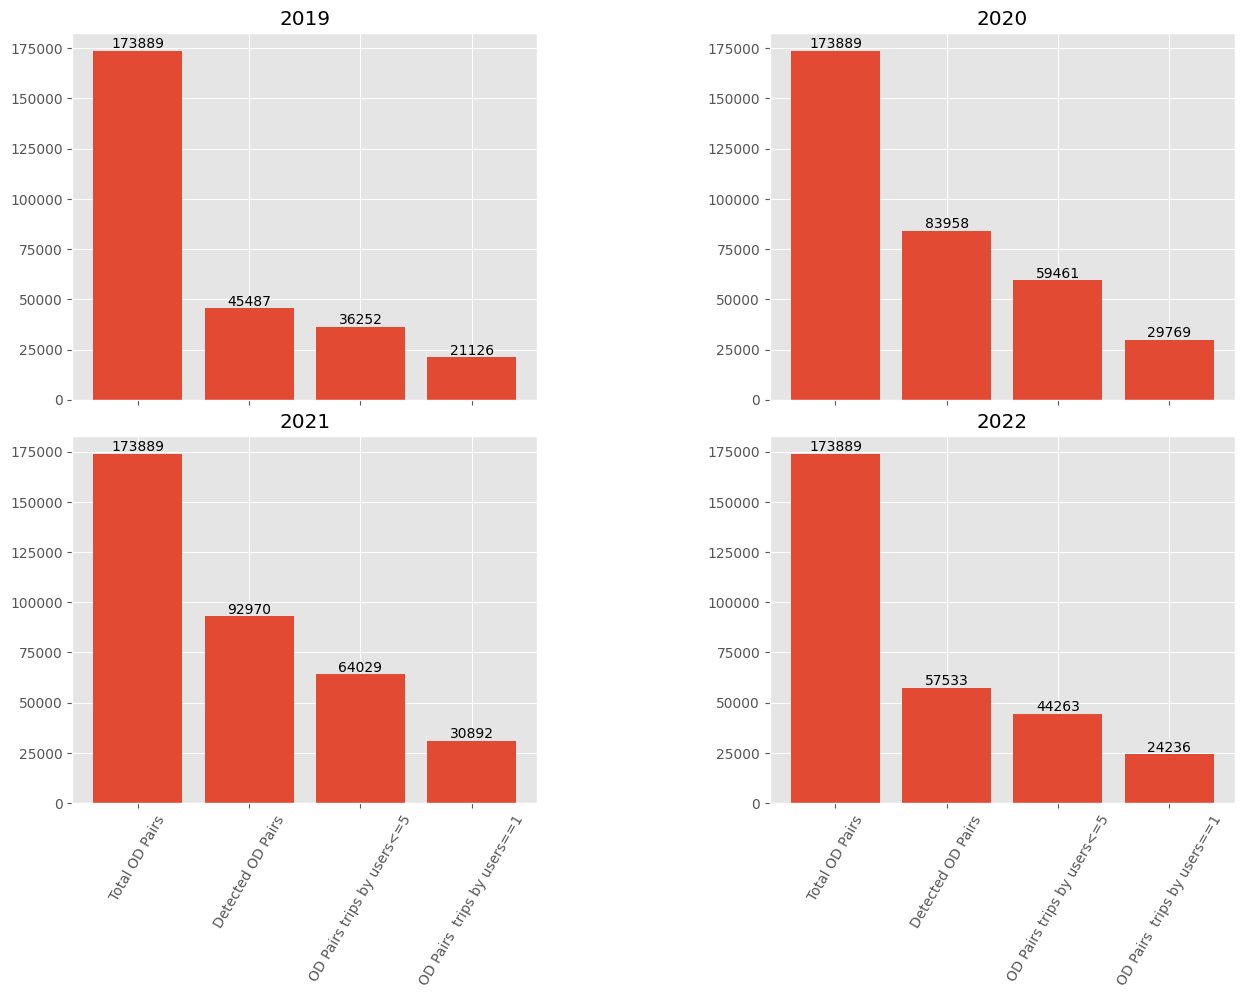

In [128]:
df_collection=[
    [df_2019,df_2020],
    [df_2021,df_2022]
    ]
year=[
    ['2019','2020'],
    ['2021','2022']
]

fig,ax= plt.subplots(2,2,figsize=(15,10),sharex='col')
plt.subplots_adjust(wspace=0.5,hspace=0.1)

for i in range(2):
    for j in range(2):

        y=[(417*417),df_collection[i][j].shape[0],df_collection[i][j][df_collection[i][j]['num_users']<=5].shape[0],df_collection[i][j][df_collection[i][j]['num_users']==1].shape[0]]
        x=['Total OD Pairs','Detected OD Pairs','OD Pairs trips by users<=5','OD Pairs  trips by users==1']

        bars=ax[i][j].bar(x,y)
        ax[i][j].set_title(year[i][j])

        # Add values on top of the bars
        for bar, value in zip(bars, y):
            height = bar.get_height()
            ax[i][j].text(bar.get_x() + bar.get_width() / 2, height, f'{value}', ha='center', va='bottom')
        
        ax[i][j].set_xticks(range(len(x)))
        ax[i][j].set_xticklabels(x, rotation=60, ha='center')
 
plt.show()


In [129]:
comb_df=df_2019.merge(df_2020,how='outer',on=['origin_iz_id','destination_iz_id'],suffixes=('_2019', '_2020'))
comb_df=comb_df.merge(df_2021,how='outer',on=['origin_iz_id','destination_iz_id'])

comb_df.rename(columns={'total_trips':'total_trips_2021'},inplace=True)
comb_df.rename(columns={'num_users':'num_users_2021'},inplace=True)

comb_df=comb_df.merge(df_2022,how='outer',on=['origin_iz_id','destination_iz_id'])
comb_df.rename(columns={'total_trips':'total_trips_2022'},inplace=True)
comb_df.rename(columns={'num_users':'num_users_2022'},inplace=True)



comb_df['avg_trips']=(comb_df['total_trips_2019']+comb_df['total_trips_2020']+comb_df['total_trips_2021']+comb_df['total_trips_2022'])/4
comb_df['avg_num_users']=(comb_df['num_users_2019']+comb_df['num_users_2020']+comb_df['num_users_2021']+comb_df['num_users_2022'])/4

To address this issue, we calculated the average number of trips for each Origin-Destination (OD) pair over the four-year period spanning from 2019 to 2022. As a result of this averaging process, we observed that the number of trips was available for 115,923 OD pairs out of the total 173,889 OD pairs. Additionally, the count of OD pairs with lower representativeness noticeably decreased after implementing this averaging approach.

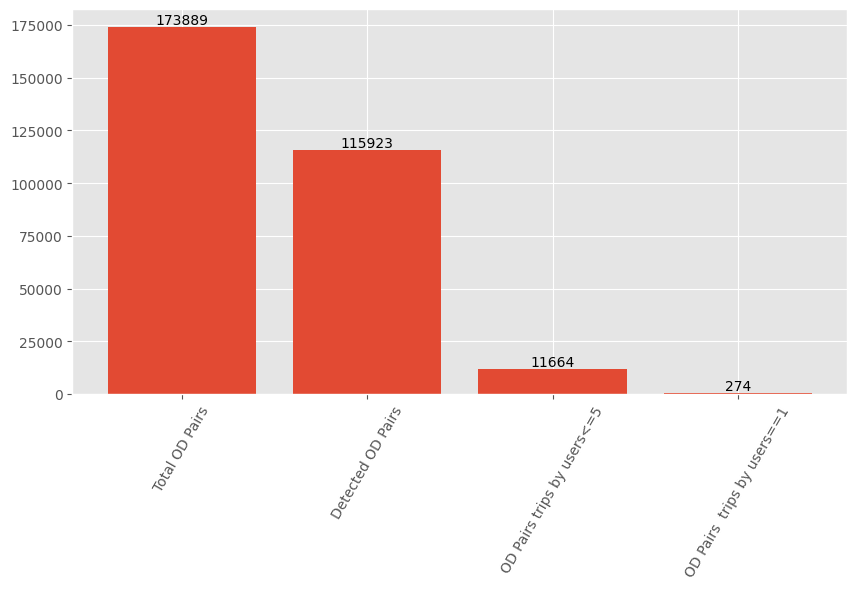

In [130]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
y=[(417*417),comb_df.shape[0],comb_df[comb_df['avg_num_users']<=5].shape[0],comb_df[comb_df['avg_num_users']==1].shape[0]]
x=['Total OD Pairs','Detected OD Pairs','OD Pairs trips by users<=5','OD Pairs  trips by users==1']

bars=ax.bar(x,y)
# Add values on top of the bars
for bar, value in zip(bars, y):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{value}', ha='center', va='bottom')
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation=60, ha='center')
plt.show()


In [131]:
od_2022=pd.read_csv(f'U:\Projects\Huq\Faraz\\final_OD_work\\2022\od_matrix\\expended_type5_od_iz_500m_2022.csv')
od_2022=od_2022[['origin','destination','act_cncl_weighted_trips']]


In [157]:
avg_od=pd.read_csv(f'U:\Projects\Huq\Faraz\\final_OD_work\\avg_type5_od_iz_500m_avg.csv')
avg_od=avg_od[['origin','destination','act_cncl_weighted_trips']]


In [ ]:
from_od_2022=od_2022.groupby('origin').agg({'act_cncl_weighted_trips':'sum'}).reset_index()
from_od_2022['percentage']=from_od_2022['act_cncl_weighted_trips']/from_od_2022['act_cncl_weighted_trips'].sum()*100
from_od_2022

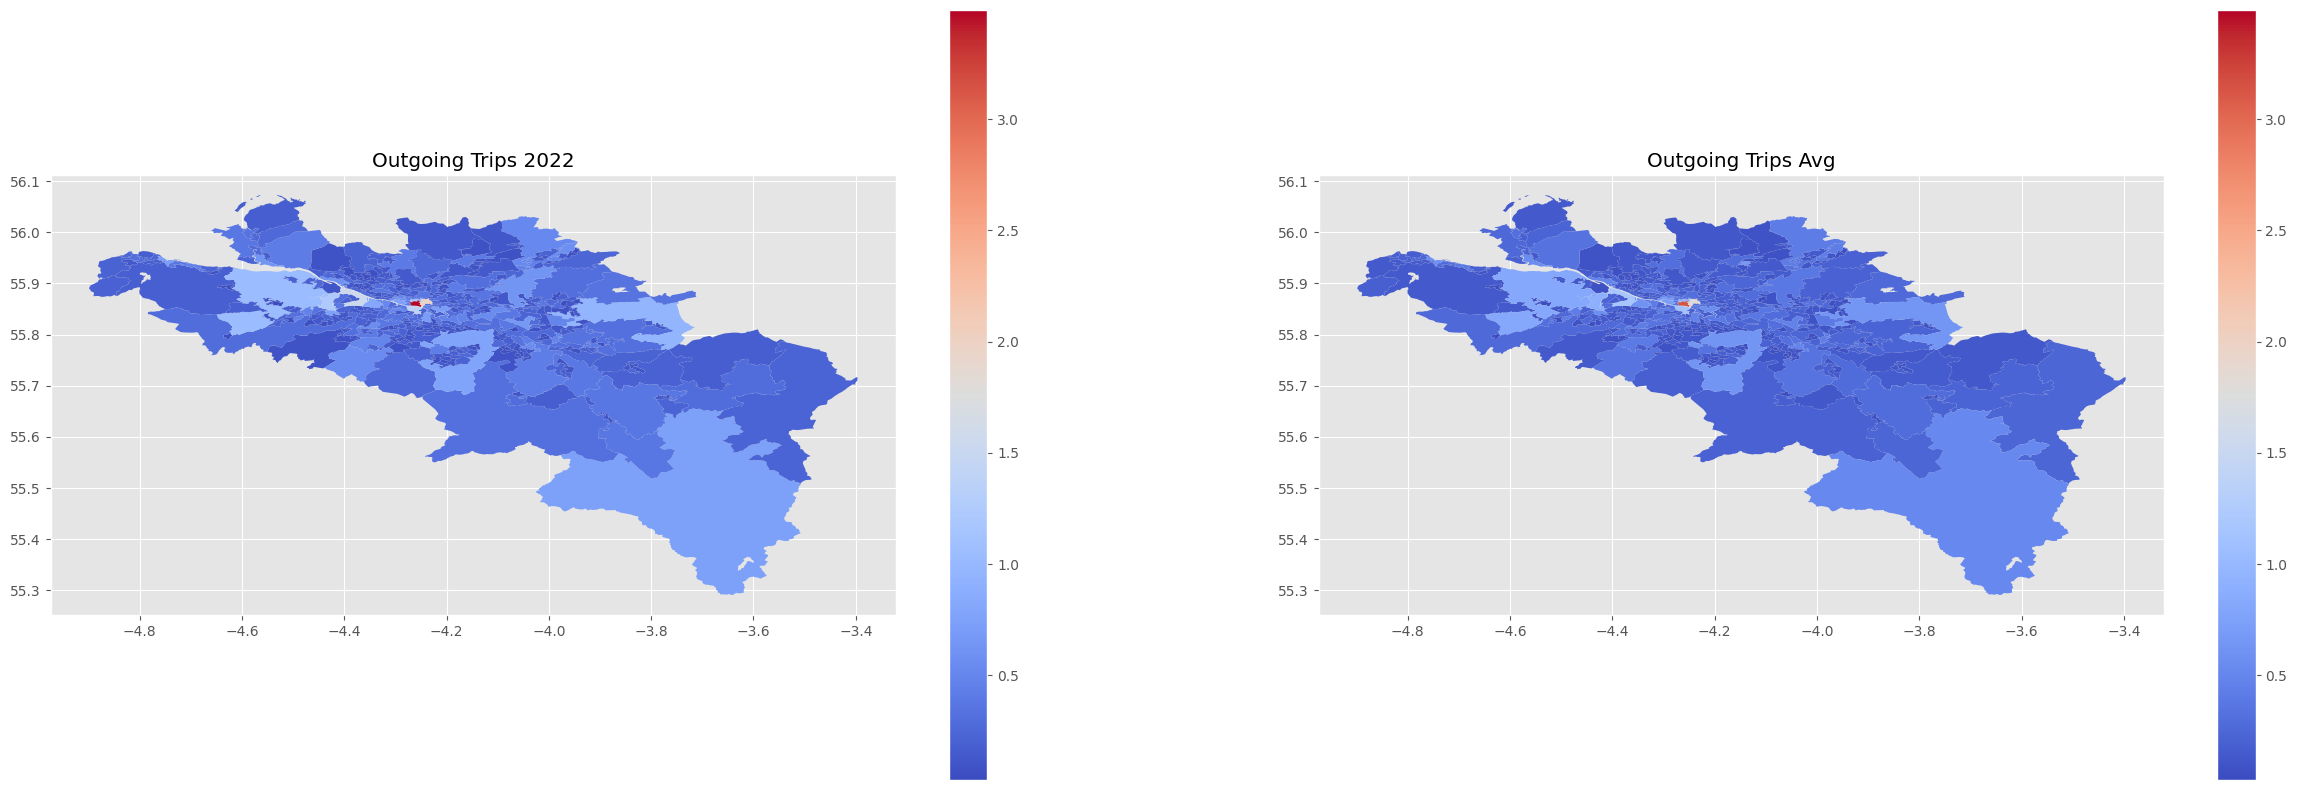

In [198]:
# From OD 2022
from_od_2022=od_2022.groupby('origin').agg({'act_cncl_weighted_trips':'sum'}).reset_index()
#from_od_2022['act_cncl_weighted_trips']=np.log(from_od_2022['act_cncl_weighted_trips'])
from_od_2022['percentage']=from_od_2022['act_cncl_weighted_trips']/from_od_2022['act_cncl_weighted_trips'].sum()*100
from_od_2022=gpd.GeoDataFrame(from_od_2022.merge(gcc_iz_id[['iz_id','geometry']],how='left',left_on='origin',right_on='iz_id'),geometry='geometry')
from_od_2022.drop_duplicates(subset=['origin','act_cncl_weighted_trips'],inplace=True)
from_od_2022.sindex

# From Avg OD
from_avg_od=avg_od.groupby('origin').agg({'act_cncl_weighted_trips':'sum'}).reset_index()
#from_avg_od['act_cncl_weighted_trips']=np.log(from_avg_od['act_cncl_weighted_trips'])
from_avg_od['percentage']=from_avg_od['act_cncl_weighted_trips']/from_od_2022['act_cncl_weighted_trips'].sum()*100
from_avg_od=gpd.GeoDataFrame(from_avg_od.merge(gcc_iz_name[['iz_name','geometry']],how='left',left_on='origin',right_on='iz_name'),geometry='geometry')
from_avg_od.drop_duplicates(subset=['origin','act_cncl_weighted_trips'],inplace=True)
from_avg_od.sindex



# Create color normalization
norm = mcolors.Normalize(vmin=min(from_od_2022['percentage'].min(), from_avg_od['percentage'].min()), 
                          vmax=max(from_od_2022['percentage'].max(), from_avg_od['percentage'].max()))
                        
fig,ax=plt.subplots(1,2,figsize=(30,10))
from_od_2022.plot(ax=ax[0],column='percentage',cmap='coolwarm', linewidth=0.8,legend=True,norm=norm)
ax[0].set_title('Outgoing Trips 2022')

from_avg_od.plot(ax=ax[1],column='percentage',cmap='coolwarm', linewidth=0.8,legend=True, norm=norm)
ax[1].set_title('Outgoing Trips Avg')



plt.show()



# OD Products

**Producing 5 Types of OD Matrices**
- Type 1: AM peak weekdays (7am-10am)
- Type 2: PM peak weekdays (4 pm-7 pm)
- Type 3: Interpeak weekdays (10 am–2 pm) 
- Type 4: Interpeak weekends  (10am–2pm)
- Type 5: Others

In [166]:
fname=f'U:\Projects\Huq\Faraz\\final_OD_work\\avg_type1_od_iz_200m_avg.csv'
df=pd.read_csv(fname)
df.drop(columns=['year','distance_threshold','geography_level','percentage'],inplace=True)
numeric_cols = df.select_dtypes(include=['float64','int64']).columns
perc_cols=['perc_trips','perc_activity_weighted_trips','perc_council_weighted_trips','perc_act_cncl_weighted_trips']
numeric_cols=[x for x in numeric_cols if x not in perc_cols]
df[numeric_cols] = df[numeric_cols].round().astype(int)


,origin,destination,trips,activity_weighted_trips,council_weighted_trips,act_cncl_weighted_trips,perc_trips,perc_activity_weighted_trips,perc_council_weighted_trips,perc_act_cncl_weighted_trips
0,Dalmarnock,Dalmarnock,92,108584,13236,108950,0.028178,0.036270,0.024018,0.036347
1,Dalmarnock,IZ08,0,50,29,56,0.000076,0.000017,0.000053,0.000019
2,Dalmarnock,City Centre West,3,2356,432,2226,0.000916,0.000787,0.000783,0.000743
3,Dalmarnock,Strathbungo,0,210,91,194,0.000076,0.000070,0.000165,0.000065
4,Dalmarnock,Pollokshaws,0,30,26,30,0.000076,0.000010,0.000047,0.000010
...,...,...,...,...,...,...,...,...,...,...
173884,Hazelbank and Kirkfieldbank,"Forth, Braehead and Auchengray",16,8741,2168,8090,0.005040,0.002920,0.003935,0.002699
173885,Hazelbank and Kirkfieldbank,"Chapelton, Glengavel and Sandford",18,17799,3234,17827,0.005498,0.005945,0.005869,0.005947
173886,Hazelbank and Kirkfieldbank,Earnock,0,0,0,0,0.000000,0.000000,0.000000,0.000000
173887,Hazelbank and Kirkfieldbank,Carluke South,14,4749,1542,4450,0.004124,0.001586,0.002798,0.001485


In [169]:
df=df[['origin', 'destination',
       'perc_act_cncl_weighted_trips']]
df.rename(columns={'perc_act_cncl_weighted_trips':'trip_percentage'},inplace=True)
df

,origin,destination,trip_percentage
0,Dalmarnock,Dalmarnock,0.036347
1,Dalmarnock,IZ08,0.000019
2,Dalmarnock,City Centre West,0.000743
3,Dalmarnock,Strathbungo,0.000065
4,Dalmarnock,Pollokshaws,0.000010
...,...,...,...
173884,Hazelbank and Kirkfieldbank,"Forth, Braehead and Auchengray",0.002699
173885,Hazelbank and Kirkfieldbank,"Chapelton, Glengavel and Sandford",0.005947
173886,Hazelbank and Kirkfieldbank,Earnock,0.000000
173887,Hazelbank and Kirkfieldbank,Carluke South,0.001485
